In [1]:
from google.colab import files

uploaded = files.upload()  # select your video file
video_path = list(uploaded.keys())[0]
print("Uploaded video:", video_path)


Saving WIN_20251123_01_42_13_Pro.mp4 to WIN_20251123_01_42_13_Pro.mp4
Uploaded video: WIN_20251123_01_42_13_Pro.mp4


In [2]:
import cv2

cap = cv2.VideoCapture(video_path)
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)

# Video properties
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

# Video writers
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out_fg = cv2.VideoWriter('foreground_output.mp4', fourcc, fps, (width, height), False)
out_bg = cv2.VideoWriter('background_output.mp4', fourcc, fps, (width, height), True)


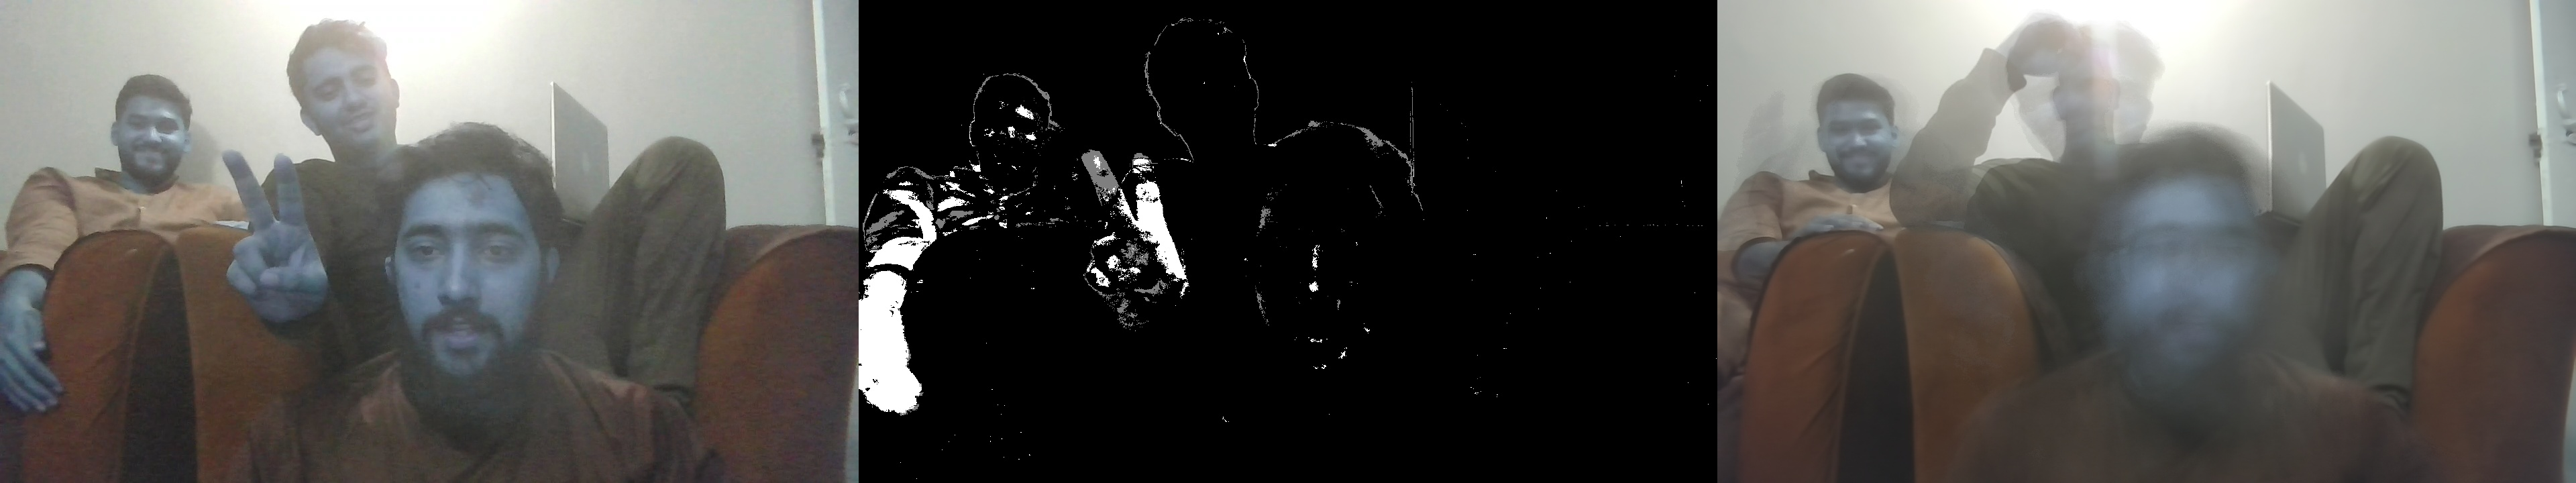


Foreground video saved as 'foreground_output.mp4'
Background video saved as 'background_output.mp4'


In [3]:
import numpy as np
from IPython.display import display, clear_output, Image

frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    fgmask = fgbg.apply(frame)

    bg = fgbg.getBackgroundImage()

    out_fg.write(fgmask)
    if bg is not None:
        out_bg.write(bg)

    if bg is not None:
        fg_rgb = cv2.cvtColor(fgmask, cv2.COLOR_GRAY2RGB)
        bg_rgb = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        combined = np.hstack((frame_rgb, fg_rgb, bg_rgb))
        _, buf = cv2.imencode('.jpg', combined)
        clear_output(wait=True)
        display(Image(data=buf.tobytes()))

    frame_count += 1
    if frame_count % 10 == 0:
        print(f"Processed {frame_count} frames", end='\r')

cap.release()
out_fg.release()
out_bg.release()
print("\nForeground video saved as 'foreground_output.mp4'")
print("Background video saved as 'background_output.mp4'")


In [4]:
from google.colab import files

files.download('foreground_output.mp4')
files.download('background_output.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>